In [28]:
!pip install pingouin seaborn matplotlib
# Import libraries
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Set random seed for reproducibility
np.random.seed(123)
# --- Dataset 1: Dr. Zeppo (One-sample) ---
zeppo = pd.DataFrame({'grade': np.random.normal(72.3, 9.5, 20)})
# --- Dataset 2: Dr. Harpo (Independent samples) ---
harpo = pd.DataFrame({
'grade': np.concatenate([
np.random.normal(74.5, 9.0, 15),   # Anastasia
np.random.normal(69.1, 5.8, 18)    # Bernadette
]),
'tutor': ['Anastasia']*15 + ['Bernadette']*18
})


In [30]:
# --- Dataset 3: Dr. Chico (Paired samples) ---
test1 = np.random.normal(57.0, 6.0, 20)
test2 = test1 + np.random.normal(1.4, 0.94, 20)  # consistent improvement
chico = pd.DataFrame({'test1': test1, 'test2': test2})
# --- Dataset 4: Clinical Trial (One-Way ANOVA) ---
clinical = pd.DataFrame({
'mood_gain': np.concatenate([
np.random.normal(0.45, 0.35, 6),   # placebo
np.random.normal(0.72, 0.45, 6),   # anxifree
np.random.normal(1.48, 0.21, 6)    # joyzepam
]),
'drug': ['placebo']*6 + ['anxifree']*6 + ['joyzepam']*6
})

1. Dr. Zeppo (One-Sample T-Test)

Ada standar nilai nasional (katakanlah 67.5). Terus punya satu kelas murid (kelasnya Dr. Zeppo).

mau cek, murid-murid di kelas ini nilainya beda jauh nggak sama standar nasional itu?

Kalau rata-rata kelas ini 72, apakah mereka emang pinter, atau cuma hoki doang?



=== 1. Dr. Zeppo (Cek Rata-Rata) ===
Cek Normal:               W      pval  normal
grade  0.961196  0.568019    True


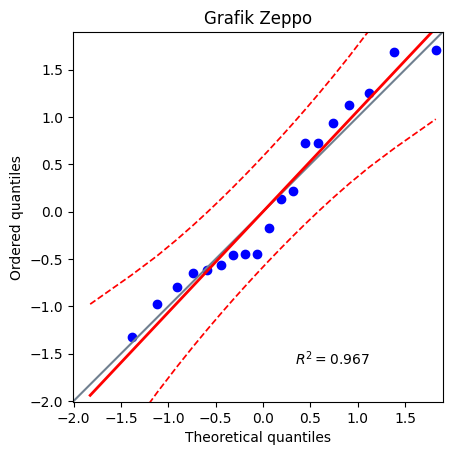

Hasil T-Test Zeppo:
               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  2.203898   19   two-sided  0.040065  [67.8, 78.98]  0.492807  1.654   

           power  
T-test  0.552481  


In [38]:
print("\n=== 1. Dr. Zeppo (Cek Rata-Rata) ===")
# Cek apakah datanya normal
print("Cek Normal:", pg.normality(zeppo['grade']))
# Gambar grafik (QQ Plot)
pg.qqplot(zeppo['grade'], dist='norm')
plt.title('Grafik Zeppo')
plt.show()
# Uji t-test lawan angka 67.5
print("Hasil T-Test Zeppo:")
print(pg.ttest(zeppo['grade'], 67.5))

2. Dr. Harpo (Independent T-Test)

Ada dua tutor privat, Anastasia sama Bernadette. Muridnya beda-beda (grup A diajar Anastasia, grup B diajar Bernadette).

Mau tau siapa yang ngajarnya lebih bagus.

adu rata-rata nilai murid Anastasia vs murid Bernadette.

Student's t-test: Anggap kemampuan murid di kedua grup itu sebaran/variasinya sama rata.

Welch's t-test: Anggap variasi muridnya beda (misal murid Anastasia nilainya stabil, murid Bernadette ada yang 10 ada yang 100). Welch ini yang lebih aman dipakai.


In [37]:
# --- Tugas A.2: Harpo ---
# pisahin data si anastasia sama bernadette
ana = harpo[harpo['tutor']=='Anastasia']['grade']
berna = harpo[harpo['tutor']=='Bernadette']['grade']

print("\n--- Hasil Harpo ---")
# student t-test (varians dianggap sama)
print("Student t-test:")
print(pg.ttest(ana, berna, correction=False))

# welch t-test (varians beda)
print("Welch t-test:")
print(pg.ttest(ana, berna, correction=True))


--- Hasil Harpo ---
Student t-test:
               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.321003   31   two-sided  0.750362  [-5.35, 7.35]  0.112224  0.347   

           power  
T-test  0.061165  
Welch t-test:
               T        dof alternative     p-val          CI95%   cohen-d  \
T-test  0.307392  22.207175   two-sided  0.761409  [-5.74, 7.74]  0.112224   

         BF10     power  
T-test  0.346  0.061165  


3. Dr. Chico (Paired T-Test)

Ini seperti iklan obat diet "Before vs After". Muridnya SAMA, tapi dites dua kali (Tes 1 dan Tes 2).

Tujuannya mau tau apakah ada perbaikan nilai dari tes pertama ke tes kedua.

Karena orangnya sama,  pakai tes "Paired" (berpasangan). Kalau si A nilai tes 1-nya 50 terus tes 2-nya 60, berarti ada kemajuan.

In [34]:
# --- Tugas A.3: Chico ---
print("\n--- Hasil Chico ---")
# ini data berpasangan, jdi pake paired=True
print(pg.ttest(chico['test2'], chico['test1'], paired=True))


--- Hasil Chico ---
              T  dof alternative     p-val         CI95%   cohen-d     BF10  \
T-test  5.10701   19   two-sided  0.000063  [0.74, 1.77]  0.226148  422.487   

           power  
T-test  0.160626  


Hasil ANOVA:
  Source  ddof1  ddof2         F     p-unc       np2
0   drug      2     15  6.086132  0.011608  0.447966

Lanjut Post Hoc (pake holm):
  Contrast         A         B  Paired  Parametric         T   dof  \
0     drug  anxifree  joyzepam   False        True -1.830752  10.0   
1     drug  anxifree   placebo   False        True  1.263550  10.0   
2     drug  joyzepam   placebo   False        True  5.328353  10.0   

  alternative     p-unc    p-corr p-adjust    BF10    hedges  
0   two-sided  0.097056  0.194113     holm   1.225 -0.975679  
1   two-sided  0.235054  0.235054     holm   0.761  0.673395  
2   two-sided  0.000334  0.001001     holm  66.596  2.839685  

--- Cek Syarat ---
Homogenitas:
               W      pval  equal_var
levene  1.971387  0.173723       True

Normalitas residual:
                  W      pval  normal
mood_gain  0.951409  0.447544    True


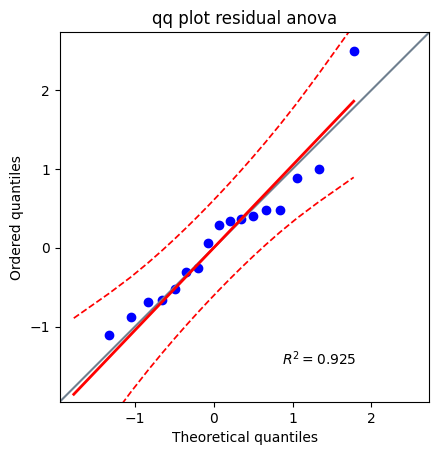

In [35]:
# --- Tugas B: ANOVA  ---

# jalanin anova
print("Hasil ANOVA:")
hasil_aov = pg.anova(data=clinical, dv='mood_gain', between='drug')
print(hasil_aov)


p_val = hasil_aov['p-unc'][0] # ambil nilai p

if p_val < 0.05:
    print("\nLanjut Post Hoc (pake holm):")
    # cek bedanya
    print(pg.pairwise_tests(data=clinical, dv='mood_gain', between='drug', padjust='holm'))
else:
    print("ga signifikan, skip post hoc")

# 3. cek asumsi/syarat
print("\n--- Cek Syarat ---")

# cek varians
print("Homogenitas:")
print(pg.homoscedasticity(data=clinical, dv='mood_gain', group='drug', method='levene'))


# itung manual sisa errornya
rata2_grup = clinical.groupby('drug')['mood_gain'].transform('mean')
sisa = clinical['mood_gain'] - rata2_grup

print("\nNormalitas residual:")
print(pg.normality(sisa))

# plot terakhir
pg.qqplot(sisa, dist='norm')
plt.title('qq plot residual anova')
plt.show()

1. Why is Welch’s t-test generally preferred over Student’s t-test in practice?

Welch's t-test lebih disukai karena lebih "aman" dan robust. Student's t-test mewajibkan asumsi bahwa varians kedua kelompok harus sama

2.What does η² = 0.71 mean in the context of the antidepressant clinical trial?
sebesar 0.71 menunjukkan effect size yang sangat besar. Artinya, 71% perubahan mood (mood_gain) pada pasien disebabkan oleh perbedaan jenis obat yang mereka minum. Sisa 29%-nya disebabkan oleh faktor lain. Ini menunjukkan obat tersebut punya pengaruh yang sangat kuat.

3. Why doesn’t a significant ANOVA tell us which groups differ? Why are post hoc tests
necessary?
ANOVA itu uji menyeluruh (omnibus). Hipotesis nol-nya adalah rata-rata A = rata-rata B = rata-rata C. Jika hasilnya signifikan, ANOVA menjabarkan bahwa Setidaknya ada satu kelompok yang beda, tapi tidak bilang kelompok mana yang beda (apakah A vs B, atau B vs C?).

4. If you obtained p = 0.06 in an independent-samples t-test, would you conclude “no
effect”? Why or why not?